
# Goodwill Estate Gaps – Rebuilt Data-Driven PRD & Analytics Demo (Portfolio Piece 2026)

## Description
Rebuilt portfolio project from my SuccessorX role (2020–2023). As Product Owner / Analyst, I analysed estate‑planning
market statistics in South Africa and hypothesised B2C and B2B2C delivery models (payment gateways, vouchers,
tiered products and managed services with execution fees and lead generation).

The original initiative was paused due to funding constraints, low early uptake and structural barriers
(legacy legal systems, mandatory lawyer processes, and the inability of AI tools to legally bind wills).

This notebook rebuilds the work to demonstrate data‑driven decision making, business analysis and Python‑based
exploratory data analysis (EDA) skills.

### Key skills demonstrated
- Market hypothesis validation
- Descriptive statistics and correlation analysis
- Gender and poverty gap analysis
- Visual analytics using matplotlib and seaborn
- PRD structuring driven by evidence

### GitHub usage
- Save this notebook as `.ipynb`
- Export generated images for documentation
- Include the generated `sample_data.csv`


In [1]:

import pandas as pd

df = pd.DataFrame({
    "Year":[2020,2021,2022,2023,2024],
    "NoWillOverallPercent":[70,68,85,68,66],
    "NoWillWomenPercent":[72,70,75,68,58],
    "NoWillMenPercent":[68,66,70,64,52],
    "PovertyRateApprox":[55,54,56,55,55],
    "FeudRiskLevel":["High","High","Very High","High","High"],
    "MarketRevenueUSD_Millions":[350,370,390,420,440],
    "WillAdoptionPercent":[30,32,15,32,34]
})

df


,Year,NoWillOverallPercent,NoWillWomenPercent,NoWillMenPercent,PovertyRateApprox,FeudRiskLevel,MarketRevenueUSD_Millions,WillAdoptionPercent
0,2020,70,72,68,55,High,350,30
1,2021,68,70,66,54,High,370,32
2,2022,85,75,70,56,Very High,390,15
3,2023,68,68,64,55,High,420,32
4,2024,66,58,52,55,High,440,34



**Note:** Statistics are synthesised for demonstration purposes using publicly discussed trends from
Sanlam Legacy surveys, the Master of the High Court (2022) and other industry reports.


In [2]:

df.to_csv("sample_data.csv", index=False)
df


,Year,NoWillOverallPercent,NoWillWomenPercent,NoWillMenPercent,PovertyRateApprox,FeudRiskLevel,MarketRevenueUSD_Millions,WillAdoptionPercent
0,2020,70,72,68,55,High,350,30
1,2021,68,70,66,54,High,370,32
2,2022,85,75,70,56,Very High,390,15
3,2023,68,68,64,55,High,420,32
4,2024,66,58,52,55,High,440,34


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       5 non-null      int64 
 1   NoWillOverallPercent       5 non-null      int64 
 2   NoWillWomenPercent         5 non-null      int64 
 3   NoWillMenPercent           5 non-null      int64 
 4   PovertyRateApprox          5 non-null      int64 
 5   FeudRiskLevel              5 non-null      object
 6   MarketRevenueUSD_Millions  5 non-null      int64 
 7   WillAdoptionPercent        5 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 452.0+ bytes


In [4]:

df.describe()


,Year,NoWillOverallPercent,NoWillWomenPercent,NoWillMenPercent,PovertyRateApprox,MarketRevenueUSD_Millions,WillAdoptionPercent
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2022.000000,71.400000,68.600000,64.000000,55.000000,394.000000,28.600000
std,1.581139,7.733046,6.465292,7.071068,0.707107,36.469165,7.733046
min,2020.000000,66.000000,58.000000,52.000000,54.000000,350.000000,15.000000
25%,2021.000000,68.000000,68.000000,64.000000,55.000000,370.000000,30.000000
50%,2022.000000,68.000000,70.000000,66.000000,55.000000,390.000000,32.000000
75%,2023.000000,70.000000,72.000000,68.000000,55.000000,420.000000,32.000000
max,2024.000000,85.000000,75.000000,70.000000,56.000000,440.000000,34.000000


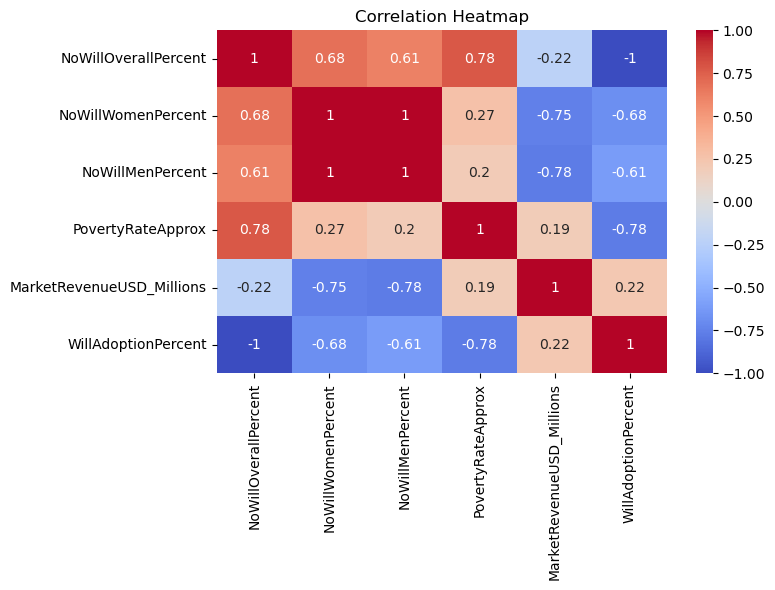

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["NoWillOverallPercent","NoWillWomenPercent","NoWillMenPercent","PovertyRateApprox","MarketRevenueUSD_Millions","WillAdoptionPercent"]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("viz_correlation_heatmap.png")
plt.show()


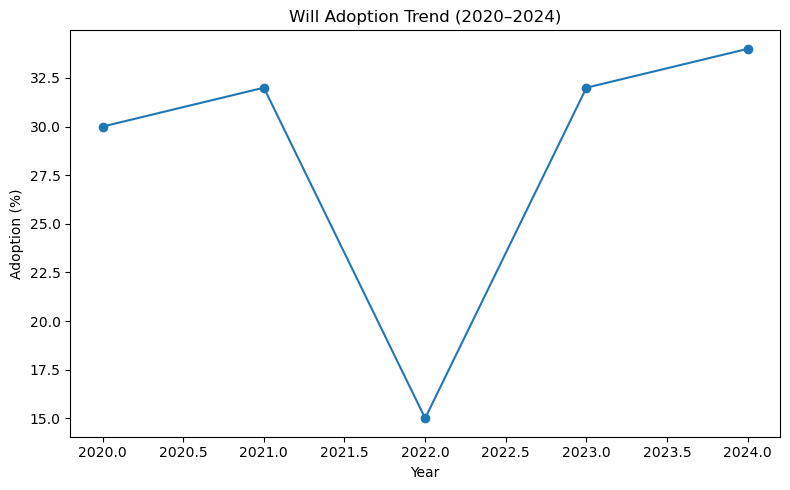

In [6]:

plt.figure(figsize=(8,5))
plt.plot(df["Year"], df["WillAdoptionPercent"], marker="o")
plt.title("Will Adoption Trend (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Adoption (%)")
plt.tight_layout()
plt.savefig("viz_will_adoption_trend.png")
plt.show()


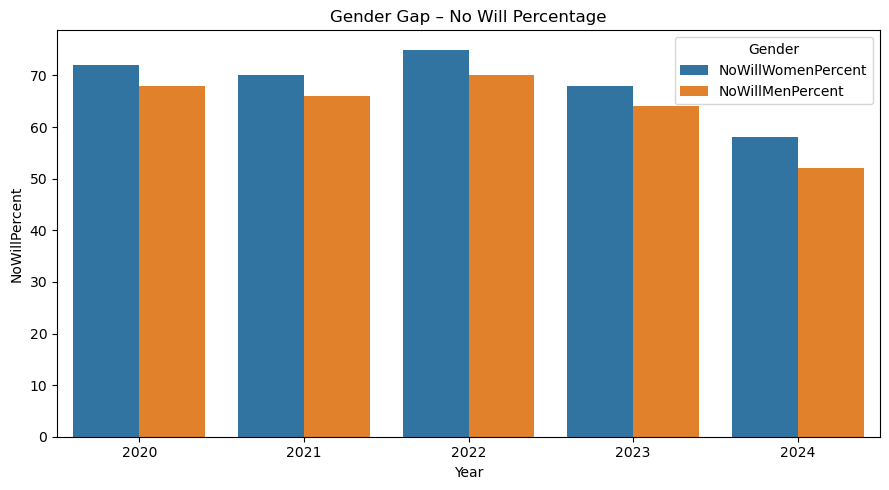

In [7]:

gender_df = df.melt(id_vars="Year",
                    value_vars=["NoWillWomenPercent","NoWillMenPercent"],
                    var_name="Gender",
                    value_name="NoWillPercent")

plt.figure(figsize=(9,5))
sns.barplot(data=gender_df, x="Year", y="NoWillPercent", hue="Gender")
plt.title("Gender Gap – No Will Percentage")
plt.tight_layout()
plt.savefig("viz_gender_gap.png")
plt.show()


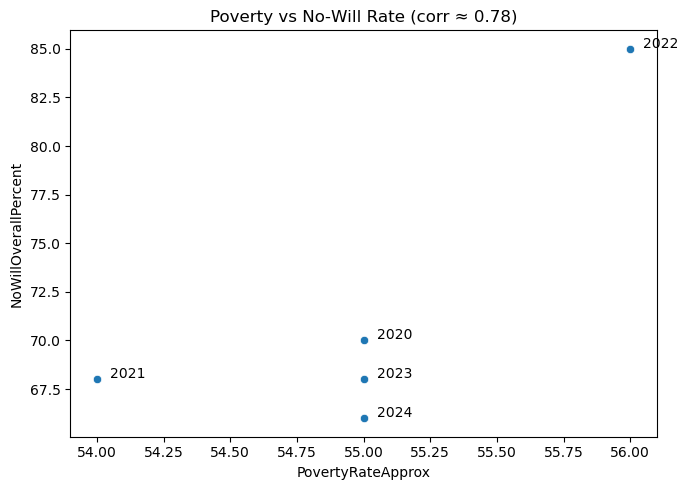

0.7772367657069209

In [8]:

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="PovertyRateApprox", y="NoWillOverallPercent")
corr_val = df["PovertyRateApprox"].corr(df["NoWillOverallPercent"])

for i,row in df.iterrows():
    plt.text(row["PovertyRateApprox"]+0.05, row["NoWillOverallPercent"]+0.05, str(int(row["Year"])))

plt.title(f"Poverty vs No‑Will Rate (corr ≈ {corr_val:.2f})")
plt.tight_layout()
plt.savefig("viz_poverty_scatter.png")
plt.show()

corr_val



# Product Requirements Document – Goodwill Estate Gaps

## Problem Statement
Aligned to SDG 1 (No Poverty). Approximately 70% of South Africa’s working population does not have a valid will.
Women are disproportionately excluded and households face increased risk of family feuds under intestate
succession. Typical will‑drafting costs range from R500 to R5,000, while estate administration fees average
3.5% plus VAT. COVID‑19 created significant backlogs and operational delays. Long queues and paper‑based
processes remain a major barrier.

## Why Customers Need a Will
- Reduced family conflict and disputes
- Greater gender inclusion and control over assets
- Ability to appoint an executor
- Faster and more predictable estate closure

## Challenge & Inspiration
The goal is to help emerging households create and protect a legacy. High costs, COVID‑related uncertainty and
limited disposable income highlight the need for low‑friction and affordable estate planning.

## Vision / Purpose
Radically accessible estate planning on any mobile device.
**Your Life, Your Legacy**

## Values
- Compassion through creativity
- Authenticity and humility
- Lifelong learning

## Extreme User Persona – Elizabeth Sithole
- 48 years old, Xhosa speaking
- Restaurant worker, R7,000 per month
- Limited technology confidence
- Assets approximately R225,000
- Frustrations: high legal costs, COVID uncertainty, lack of guidance
- Currently has no will

## Automated Will Creation Flow
1. Add personal details  
2. Capture beneficiaries  
3. Capture assets  
4. Decide allocations  
5. Nominate executor  
6. Print, sign and store  

## What We Were Working On
Multilingual conversational assistant (for example, Sesotho support).

## Benefits
- Simple, familiar chat‑style interface
- Anonymity and privacy
- Secure end‑to‑end encrypted storage

## Insights from Data
EDA shows persistent no‑will rates (≈66% in 2024), a widening gender gap, and a strong relationship between
poverty and the absence of a will. This implies that mobile‑first solutions must specifically target lower‑income
households, while accounting for legal and institutional barriers that slow digital adoption.



# Final Insights – Portfolio Perspective

Data‑driven decisions in the original pitch included TAM/SAM/SOM estimation, validation of tiered products and
voucher‑based access models, and prioritisation of accessibility features based on gender and poverty gaps.

Despite positive validation, structural impediments (mandatory legal verification, limited mobile penetration
in poorer and rural communities, and legacy systems within estate administration) significantly slowed adoption.

Portfolio value:
This project demonstrates business analysis and Python‑based EDA in a fast‑moving product environment,
showing how evidence directly informs product strategy, feature design and commercial models.
